In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([5,5.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

In [3]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,400)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,400)

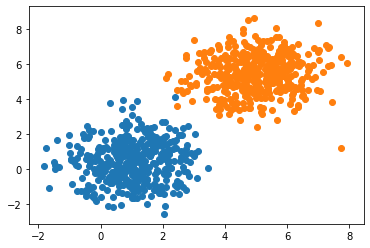

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1])
plt.scatter(dist_02[:,0],dist_02[:,1])

In [5]:
total = dist_01.shape[0] + dist_02.shape[0]

In [6]:
data = np.zeros((total,dist_01.shape[1]+1))
print(data)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [7]:
data[:400,:-1] = dist_01
data[400:,:-1] = dist_02
data[400:,-1] = 1
print(data)

[[ 0.64904007 -2.0630006   0.        ]
 [ 0.36883495 -0.16813339  0.        ]
 [ 1.01571129  0.19032208  0.        ]
 ...
 [ 3.81642701  3.91615684  1.        ]
 [ 4.04196582  5.84349275  1.        ]
 [ 6.17239357  6.65116378  1.        ]]


In [8]:
mu = np.mean(data[:,:-1],axis=0)
print(mu)
sigma = np.std(data[:,:-1],axis=0)
data[:,:-1] = (data[:,:-1]-mu)/sigma

print(data)


[2.99974421 2.95000643]
[[-1.04339989 -1.80255102  0.        ]
 [-1.16777368 -1.12120451  0.        ]
 [-0.88064665 -0.99231296  0.        ]
 ...
 [ 0.36249851  0.34740335  1.        ]
 [ 0.46260773  1.04042478  1.        ]
 [ 1.4082342   1.33084293  1.        ]]


In [9]:
np.random.shuffle(data)
print(data)

[[ 1.55773597  0.45379207  1.        ]
 [-0.86652182 -0.45771232  0.        ]
 [-1.0293623  -1.17224078  0.        ]
 ...
 [-0.55216229 -1.17058536  0.        ]
 [ 0.71849928  0.90474674  1.        ]
 [ 1.10196443  1.12684231  1.        ]]


In [10]:
ones = np.ones((data.shape[0],1))

In [11]:
final_data = np.hstack((ones,data))

In [12]:
print(final_data)

[[ 1.          1.55773597  0.45379207  1.        ]
 [ 1.         -0.86652182 -0.45771232  0.        ]
 [ 1.         -1.0293623  -1.17224078  0.        ]
 ...
 [ 1.         -0.55216229 -1.17058536  0.        ]
 [ 1.          0.71849928  0.90474674  1.        ]
 [ 1.          1.10196443  1.12684231  1.        ]]


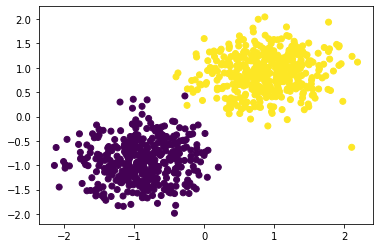

In [13]:
plt.scatter(final_data[:,1],final_data[:,2],c = final_data[:,3])
plt.show()

In [14]:
split = int(0.8*total)

In [15]:
X_train = final_data[:split,:-1]
X_test = final_data[split:,:-1]

Y_train = final_data[:split,-1]
Y_test = final_data[split:,-1]

In [16]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(640, 3) (160, 3)
(640,) (160,)


In [17]:
np.unique(Y_test,return_counts=True)

(array([0., 1.]), array([72, 88], dtype=int64))

In [18]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [19]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [20]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += Y[i]*np.log2(y_hat) + (1-Y[i])*np.log2(1-y_hat)
    return -total_error/m

In [21]:
def get_grad(Y,X,theta,learning_rate = 0.1):
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (-Y[i] + y_hat)*x
    return grad/m

In [22]:
def gradientDescent(X,Y,learning_rate = 0.1):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(500):
        theta = theta - learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
    return theta,error_list
        

In [23]:
theta,error_list = gradientDescent(X_train,Y_train)

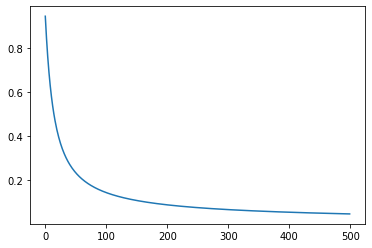

In [24]:
plt.plot(error_list)

In [25]:
print(theta.shape)

(3, 1)


In [26]:
slope = -(theta[1][0]/theta[2][0])
c = -(theta[0][0]/theta[2][0])

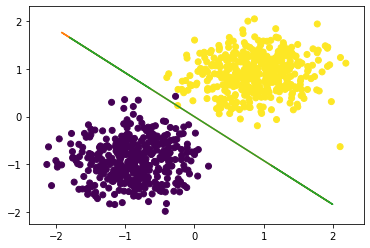

In [27]:
y = X_test*slope + c
plt.plot(X_test,y)
plt.scatter(final_data[:,1],final_data[:,2],c = final_data[:,3])

In [28]:
def predict(X_test,theta):
    out = hypothesis(X_test,theta)
    for i in range(out.shape[0]):
        if out>0.5:
            return("1")
        else:
            return("0")

In [29]:
Y_Pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [30]:
Y_test = np.array(Y_test,dtype='int32')

In [31]:
print("Test Accuracy")
np.sum((Y_Pred==Y_test))*100/Y_test.shape[0]

Test Accuracy


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


0.0